In [115]:
#Titanic nprzykład analizy

In [116]:
#1. Import danych i bibliotek

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv(r"C:\Dane\2_ML_Projekty\003_programowanie_ML_zadanka_kurs_wprowadzenie\Moduł 4\Zbiory danych\titanic.csv")

In [119]:
#Ogólny opis danych

In [120]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
# id pasażera, Survived czy przeżył czy nie pclass klasa gdzie byłitd Sibl-krewnirodzenstwo  
#Parch-ile rodziców lub dzieci bylo na pokladzie
#Embarked który port

In [122]:
#wyswietlimy wszystkie zmienne,podaje typ,ile obserwacji 891 ile jest nie null obserwacji dla age 714 różnica to wartości brakujące

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [124]:
df.shape   #ile wierszy ile kolumn

(891, 12)

In [125]:
df.describe()  #opis zmiennych numerycznych jak w age by było 200 to by trzeba usunac ten rekord

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
df.describe(include=['O'])    #wyświetlenie zmiennnych kategorycznych

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [127]:
# zliczamy braki danych wartości unikalne dwie płcie.

In [128]:
#3. Analiza zmiennej celu Survived

In [129]:
df['Survived'].value_counts()   #ilu pasażerów przeżyło a ilu nie

Survived
0    549
1    342
Name: count, dtype: int64

In [130]:
#to samo w ujęciu procentowym

In [131]:
df['Survived'].value_counts(normalize=True) 

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [132]:
#4.Zmienna celu a zmienne jakościowe 

In [133]:
#Grupowanei zbioru danych po zmiennej jakościowej i wyliczamy średnia wartość zmiennej celu. 
#Sprawdzimy czy udział osób które przeżyły jest większy w konkretnej kategorii.

In [134]:
#wybieramy szukaną zmienna i zmienna jakościową inną

In [135]:
#szukana zmienna i zmienna jakosciowa bierzemy je i grupujemy po zmiennej jakosciowej wyznaczajac srednia

In [136]:
df[['Survived','Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [137]:
# Sprawdzilismy, że znaczenie na przeżycie miała płeć.Kobiety i dzieci szły jako pierwsze do szalup

In [138]:
#teraz próbujemy sprawdzić zaleznosć miedzy tymi co przeżyli a klasa 

In [139]:
df[['Survived','Pclass']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [140]:
#procentowy rozkład tych co przeżyli w  zaleznosci od liczby rodzeństwa

In [141]:
df[['Survived','SibSp']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [142]:
#procentowo Ci co przeżyli w zaleznosci od liczby rodzenstwa warto sprawdzić 
#lcizebnosc tych grup bo 8 rodzenstwa miało niewiele osob.

In [143]:
#Zaleznosc między tymi co przeżyli a portem rozpoczecia podróży

In [144]:
df[['Survived','Embarked']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [145]:
#Pozostałem zmienne jak name ticket i cabin mają duzo unikalnych wartości 

In [146]:
df.describe(include=['O']) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [147]:
#5.Zmienna celu pod katem zmiennych ilosciowych

In [148]:
#to grupowanie co powyżej nie będzie miało sensu w ich przypadku.Grupowanie ale po zmiennej celu i zobaczymy i jaka 
#jest wartość średniej zmiennej ilościowej dla odpowadajacej kategorii zmiennej celu.

In [149]:
df[['Survived','Age']].groupby(['Survived']).mean()

,Age
Survived,
0,30.626179
1,28.343690


In [150]:
#otrzymuje informacje jaka była średnia wieku tych co nie przeżyli i ci co przeżyli katastrofę

In [151]:
#tak równiez moge ocenic czy dana zmienna ma wpływ na zmienną celu czy jest zróznicowanie

In [152]:
#analiza zmiennej Fare kosztu biletu

In [153]:
df[['Survived','Fare']].groupby(['Survived']).mean()

,Fare
Survived,
0,22.117887
1,48.395408


In [154]:
#osoby które rpzeżyły płaciły za bilet  więcej od tych co nie przeżyli

In [155]:
#6. Wizualizacje

In [156]:
#Jak na wykresie słupkowym  kształtuje sieudział osób które przeżyły katastrofęz podziałem na płeć

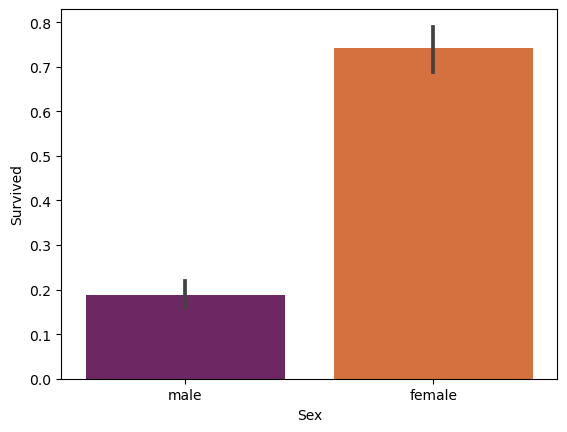

In [157]:
sns.barplot(x='Sex', y='Survived', data=df, palette = 'inferno')
plt.show()

In [158]:
# wcześniejszej analizy odnośnie ilu mezczyzn a ile kobiet przeżył:
df[['Survived','Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [159]:
#Dane te sie potwierdziły

In [160]:
#podobny wykres dla zmiennej Embarked gdzie osoba wisadała na pokład statku

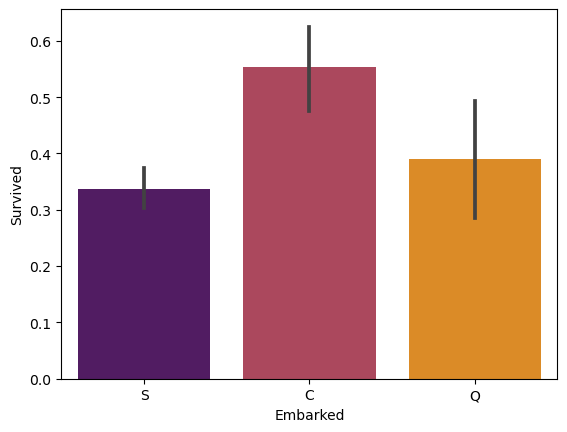

In [161]:
sns.barplot(x='Embarked', y='Survived', data=df, palette = 'inferno')
plt.show()

In [162]:
#analogicznie do tych danych odnosnie kto rpzeżyl wg portów gdzie wsiadali z punktu 3
df[['Survived','Embarked']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


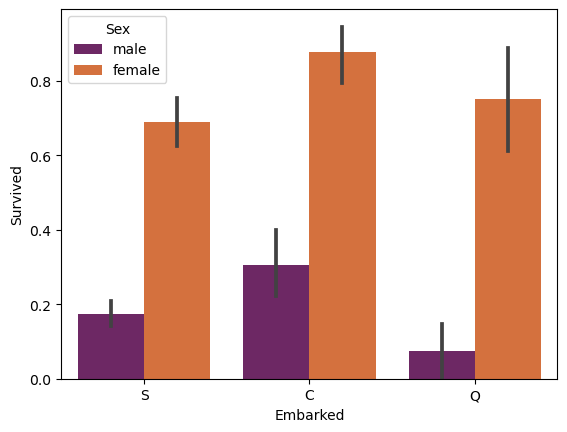

In [163]:
#łączymy teraz 3 zmienne
#analogicznie do tych danych odnosnie kto rpzeżyl wg portów gdzie wsiadali z punktu 3
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df, palette = 'inferno')
plt.show()

In [164]:
# wkróym porcie według płci był największy odsetek ludzi co przeżyli katastrofę.Dla portu C najwiecej kobiet 
#przeżyło adla Q najmniej mężczyzn przeżyło

In [165]:
#Wykorzystamy wkyres FacetGrid z seaborn pokaże on rozkłady wybranej zmiennej numerycznej w podziale na kategorie zmiennej celu.
#Zobaczymy czy te rozkłady się róznią.

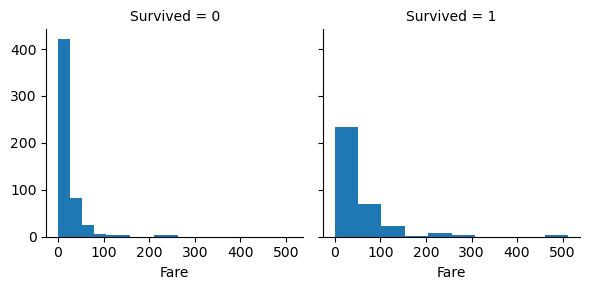

In [166]:
mapa=sns.FacetGrid(df,col="Survived")
mapa.map(plt.hist, 'Fare')
plt.show()

In [167]:
#Sporo tych co nie przeżył katastrofy kupiło tanie bilety. Ci co przeżyli zapłacili wiecej za bilety

In [168]:
#Podobny wykres dla zmiennej wiek Age


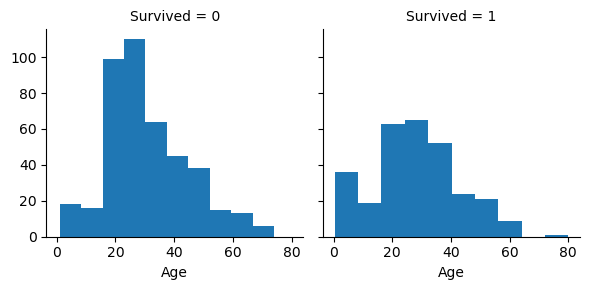

In [169]:
mapa=sns.FacetGrid(df,col="Survived")
mapa.map(plt.hist, 'Age')
plt.show()

In [170]:
#najwięcej przeżyło luzi miedzy 20-30 rok życia a najwięcej zmarło między19 a 30.

In [171]:
#7 ogólna analiza zmiennych objasniających zmiennych jakosciowych i ilościowych

In [172]:
#Sprawdzenie rozkłądu zmiennych jakosciowych- sprawdzenie rozkładu liczebnosci poszcególnych zmiennych za pomocą metody value_counts()

In [173]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
#przypominam zmienne

In [175]:
#tworzę lsite zmiennych kategorycznych
chars =['Pclass', 'Sex','SibSp', 'Parch', 'Embarked']
for i in chars:
    print(df[i].value_counts())
    print(' ')

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
 
Sex
male      577
female    314
Name: count, dtype: int64
 
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
 
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
 


In [176]:
#jeśli sa małoliczne kategorie to się zastanowić sie trzeba czy poxniej nie chcemy ich połaczyć

In [177]:
#SibSp
#Dla osób z dużą liczbą rodzeństwa 5-8 jest malo tych osób i to można ew połaczyć a nawet jeszcze z 3+
#0    608
#1    209
#2     28
#4     18
#3     16
#8      7
#5      5
#Name: count, dtype: int64

In [178]:
#Parch
#0    678
#1    118
#2     80
#5      5
#3      5
#4      4
#6      1
#Name: count, dtype: int64 podobnie dla Parch i 6,5,4,3 sa małe liczebnosci i mozna dołaczyć do 2

In [179]:
# w embarked nic nie robimy

In [180]:
#Zmienne ilościowe


In [181]:
nums =['Age','Fare']

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


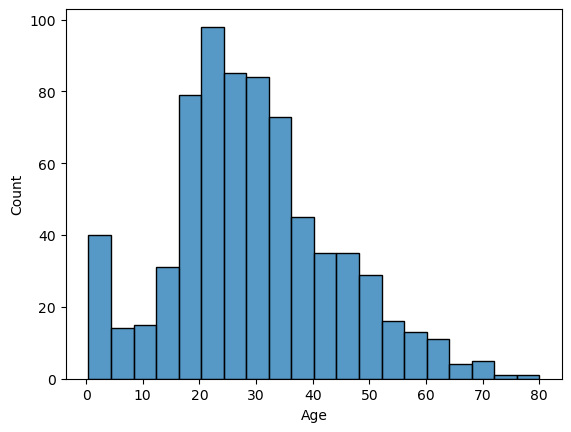

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


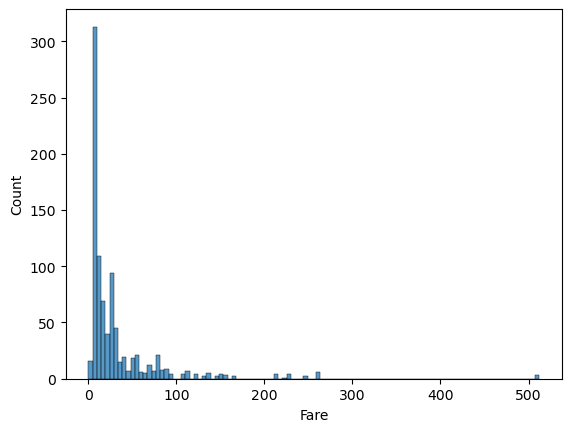

In [182]:
for i in nums:
    sns.histplot(df[i])
    plt.show()

In [183]:
#bardzo dużo osób płaciło mało za bilet mało ale wiecej też jest rozkład

In [184]:
#8. transformacja zmiennych Feature engineering transformacja zmiennych do uzyskania lepszej inforacji odnosnie zmiennych.

In [185]:
#Usuwany nie potrzebne zmienne:

In [186]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
# nie potrzebujemy passenger Id, ticket oraz Cabin 

In [188]:
#Z tych wartości nic sensownego nie wyciągniemy.

In [189]:
#Zmienna name zostawiamy bo da sie wyciagnąc cos ciekaego

In [190]:
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True) #usuwamy klumny a nie wiersze axis=1 inplace=true usuniecie przypisane do danych df

In [191]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [192]:
#transformacja zmiennych 

In [193]:
#Parch SibSp moga być zmiennymi kategorycznymi i niektóre kategorie są małoliczne.

In [194]:
#sprawdzamy Parch

In [195]:
df['Parch'].value_counts() #sprawzamy jak wyglada zmienna 

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [196]:
#dla 3,4,5,6 obserwacji jest bardzo mało model się nie nauczy na kilku lub jednej obserwacji.
#Łaczymy wtedy kategorie w bardziej sensowny sposób

In [197]:
#0 i 1 zostawimy a od 2 do 6 połaczymy wjedną kategorię.
#nadpisujemy zmienną parch używając funkcje np where
#jak parch >1 przypiszemyw artośc 2+ a jak nie to wartość zmiennej parch

In [198]:
df['Parch'] = np.where(df['Parch']>1,'2+', df['Parch'])

In [199]:
#Sprawdzamy
df['Parch'].value_counts()

Parch
0     678
1     118
2+     95
Name: count, dtype: int64

In [200]:
#Sprawdzamy jak kształtuje sie zmienna SibSp

In [201]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [202]:
df['SibSp'] = np.where(df['SibSp'] >1,'2+',df['SibSp'])

In [203]:
df['SibSp'].value_counts()

SibSp
0     608
1     209
2+     74
Name: count, dtype: int64

In [204]:
#transformacja zmiennej Name
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [205]:
#mamy tu imięnazwisko, plec, czy osoba jest zamęzna czy nie. To można wyciagnąc z tych danych.Wiekszośc kobiet z wyższej klasy przeżyło katastrofe a przynajmniej wiecej kobiet niż mężczyzn.

In [206]:
#Aby znależć płeć szukamy tytułu Mr/MRs Miss itd

In [207]:
df['Name'].loc[0]

'Braund, Mr. Owen Harris'

In [208]:
df['Name'].loc[0].split(',')

['Braund', ' Mr. Owen Harris']

In [209]:
df['Name'].loc[0].split(',')[1]

' Mr. Owen Harris'

In [210]:
df['Name'].loc[0].split(',')[1].split('.')

[' Mr', ' Owen Harris']

In [211]:
df['Name'].loc[0].split(',')[1].split('.')[0]

' Mr'

In [212]:
df['Name'].loc[0].split(',')[1].split('.')[0].strip()

'Mr'

In [213]:
#wykorzystujemy lambda dos tworzenai nowej lini z danymi

In [214]:
df['Title'] = df['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip() )

In [215]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [216]:
#zliczamy nowe wiersze

In [217]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [218]:
#wszystko poniżej master robimy do other czyli porzadkujemy dane

In [219]:
df['Title'] = np.where(df['Title'].isin(['Mr', 'Miss', 'Mrs','Master']), df['Title'], 'Other')

In [220]:
#######################jeśli df od Title zawiera się w liscie['Mr', 'Miss', 'Mrs','Master' to df['Title']inaczej to Other

In [221]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [222]:
df['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

In [223]:
#Zrzucamy Name bo nie ma juz wartosci dodanej

In [224]:
df.drop('Name', axis=1, inplace=True)

In [225]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2+,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [226]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [227]:
#Podzial zbioru danych na część reningowa i testową 

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
#tworzy zbiory testowy i treningowy argument to dane czyli df oraz rozmiar zbioru testowego 0,3 to 30%całosci danych 
#df random_state liczba linijek dzielących zbiór

In [230]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=4)

In [231]:
#Sprawdzamy czy doszło do podziału zbioru

In [232]:
df.shape

(891, 9)

In [233]:
#ile ma zbór trenignowy

In [234]:
df_train.shape

(623, 9)

In [235]:
623/891

0.6992143658810326

In [236]:
df_test.shape

(268, 9)

In [237]:
#Braki danych obsługa

In [238]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [239]:
#Średnia i mediana powinny być wyliczone na zbiorze treningowym te wartości moga
#być inne na zbiorze treningowym i testowym. Danymi wyliczonymi na zbiorze treningowym uzupełniamy braki danych

In [240]:
#sprawdzamy braki danych i dostajemy sumę z podziałem na kategorie
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         125
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [241]:
#braki występują w zmiennej age oraz embarked

In [242]:
#sprawdzamy zbiór testowy 

In [243]:
df_test.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         52
SibSp        0
Parch        0
Fare         0
Embarked     0
Title        0
dtype: int64

In [244]:
#52braki dla age

In [245]:
#próbuje my się zorientowac aki to jest brak czy losowy czy nielosowy. W przypadku tych danych cięzko jest to okreslic 
#może jest to zwiazane z jakas inna zmienną...

In [246]:
#Przypisujemy osobną klase do brakujacyh obserwacji opcja nr1

In [247]:
df_train.shape

(623, 9)

In [248]:
125/623 


0.20064205457463885

In [249]:
#brakuje nam 20proc obserwacji

In [250]:
#Tworzymy zmienną która przypisze nam wartośc brak do brakujacych obserwacji.

In [251]:
#może nam pomóc wyliczenie min mediany i kwartyli zmiennej która ma braki(age)

In [252]:
df_train['Age'].describe()

count    498.000000
mean      29.978594
std       14.556153
min        0.420000
25%       21.000000
50%       28.250000
75%       38.750000
max       80.000000
Name: Age, dtype: float64

In [253]:
#Jeśli nasza zmienna Age isna to brak jak zmienna age jest mniejsza równa 21 czyli pierwszy kwartyl 25% z wykresu wyzej to przypisujemy wartośc 0-21
#jak age jest mniejsza równa 28 czyli drugi kwartyl 50% z wykresu wyzej to przypisujemy wartośc 21-28
#jak age jest mniejsza równa 39 czyli trzeci kwartyl 75% z wykresu wyzej to przypisujemy wartośc 28-39
#a ostatni warunek > 39 

In [254]:
df_train['Age_cat'] = np.where(df_train['Age'].isna(),'brak', np.where(df_train['Age']<=21, '0-21', np.where(df_train['Age']<= 28, '21-28',  np.where(df_train['Age']<= 39, '28-39', '>39'))))

In [255]:
#sprawdzamy jak kształtuje się utworzona zmienna

In [256]:
df_train['Age_cat'].value_counts()

Age_cat
0-21     134
28-39    131
brak     125
>39      118
21-28    115
Name: count, dtype: int64

In [257]:
#stworzyliśmy osobne kategorie zmiennej age

In [258]:
#Wiemy że ten brak nie jest losowy

In [259]:
#Sprawdzamy czy kategorie wieku nowe rżnicują wiek osób które przeżyły katastrofę
#liczymy średnią wieku na danych wiek survived

In [260]:
df_train[['Age_cat', 'Survived']].groupby(['Age_cat']).mean()

,Survived
Age_cat,
0-21,0.470149
21-28,0.391304
28-39,0.450382
>39,0.406780
brak,0.296000


In [261]:
#dla kategorii wieku brak udział wieku osób,które przeżyly katastrofę jest najmniejszy

In [262]:
#wynosi ok 30%

In [263]:
#To nie był brak losowy i moze nam wpłynac na analizę zmiennej celu.

In [264]:
#Tworzymy zmienną analigocznie na zbiorze testowym..df_test zamiast df_train

In [265]:
df_test['Age_cat'] = np.where(df_test['Age'].isna(),'brak', np.where(df_test['Age']<=21, '0-21', np.where(df_test['Age']<= 28, '21-28',  np.where(df_test['Age']<= 39, '28-39', '>39'))))

In [266]:
#Ukształtowanie dla zbioru testowego

In [267]:
df_test['Age_cat'].value_counts()

Age_cat
0-21     70
28-39    58
brak     52
>39      45
21-28    43
Name: count, dtype: int64

In [268]:
#Metoda alternatywna nr 2 imputacji brakujących wartości matematycznych wyliczenie sredniej bądź mediany

In [269]:
#Metoda radzenia sobie z brakami danych mediana i średnia.
#Sprawdza się rozkład zmiennej oraz jej skośność

In [270]:
#robimy histogram na danych treningowych

In [271]:
#rozkłąd jest lekko w prawą stronę ale niezbyt

<Axes: >

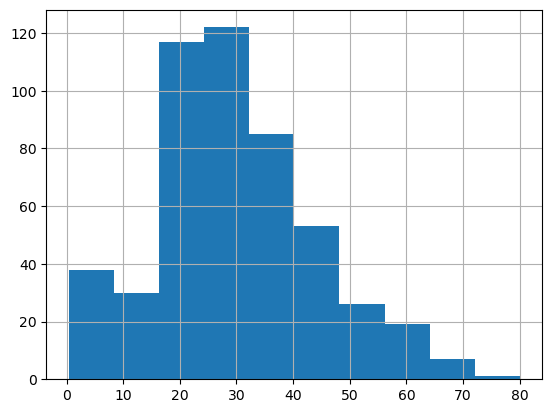

In [272]:
df_train['Age'].hist()

In [273]:
#sprawdzamy mairę skośności za pomcoą metody skew

In [274]:
df_train['Age'].skew()

0.37926641895840485

In [275]:
#skośnosć do +-0.5 nie jest silna i rozkład jest w maire symetryczny. jak skosnośc większa od 0.5 to stosujemy mediane

In [276]:
mean_age = df_train['Age'].mean()
mean_age 

29.978594377510042

In [277]:
#Metodafillna wypelnienia brakidanych wartościa sreadnia inplace nadpisuje

In [278]:
df_train['Age'].fillna(mean_age,inplace=True)

C:\Users\arcis\AppData\Local\Temp\ipykernel_15500\1533672187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(mean_age,inplace=True)


In [279]:
#sprawdzamy czy zostały jakies braki danych

In [280]:
df_train['Age'].isna().sum()

0

In [281]:
#jest zero nie ma

In [282]:
#to samo robimy na zbiorze testowym

In [283]:
df_test['Age'].fillna(mean_age, inplace=True)

C:\Users\arcis\AppData\Local\Temp\ipykernel_15500\943613364.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(mean_age, inplace=True)


In [284]:
df_test['Age'].isna().sum()

0

In [285]:
#tu tez już w zbiorze testowym nei ma braków danych

In [286]:
# metoda inna Uzupelnienia braków danych średnia mediana w grupach bardziej dokąłdne niż średnia czy mediana

In [287]:
#jeszcze raz puszczamy kod ale bez tej linii cyli
#run i selevcted and above bez fillna() df_train['Age'].fillna(mean_age,inplace=True)

In [288]:
#sprawdzamy jak wygladają dane

In [289]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_cat
537,1,1,female,30.0,0,0,106.425,C,Miss,28-39
401,0,3,male,26.0,0,0,8.050,S,Mr,21-28
554,1,3,female,22.0,0,0,7.775,S,Miss,21-28
213,0,2,male,30.0,0,0,13.000,S,Mr,28-39
434,0,1,male,50.0,1,0,55.900,S,Mr,>39


In [290]:
#ile jest brakow

In [291]:
df_train['Age'].isna().sum()

0

In [292]:
#wexmiemy zmienna Pclass

In [293]:
df_train[['Pclass','Age']].groupby(['Pclass']).mean()

,Age
Pclass,
1,36.828656
2,30.714229
3,26.549376


In [294]:
#im wyższa klasa tym średniw iek wyższy

In [295]:
#importuje wartosć więku w zaleznosci od klasy kabiny miał pasazer

In [296]:
#wykorzystuje funkcje where jesli df trainnie jest brakiem danych tak się to oznacza ~df_train['Age']) to przypisze wartosc Age
#w przeciwnym razie przypiszemy wartośc

In [297]:
df_train['Age'] = np.where(~df_train['Age'].isna(), df_train['Age'],
                          np.where(df_train['Pclass']==1, 37.995704,
                                  np.where(df_train['Pclass']==2, 30.758621, 25.230445)))

In [298]:
df_train['Age'].isna().sum()

0

In [299]:
df_test['Age'] = np.where(~df_test['Age'].isna(), df_test['Age'],
                          np.where(df_test['Pclass']==1, 37.995704,
                                  np.where(df_test['Pclass']==2, 30.758621, 25.230445)))

In [300]:
df_test['Age'].isna().sum()

0

In [301]:
#Dokaldneijsa metoda niż imputowanie za pomca całego zbioru...

In [302]:
#usuwamy zmienną age ze zbiorut renignowego it estowego


In [303]:
df_train.drop('Age', axis=1, inplace=True)
df_test.drop('Age', axis=1, inplace=True)

In [304]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_cat
537,1,1,female,0,0,106.425,C,Miss,28-39
401,0,3,male,0,0,8.050,S,Mr,21-28
554,1,3,female,0,0,7.775,S,Miss,21-28
213,0,2,male,0,0,13.000,S,Mr,28-39
434,0,1,male,1,0,55.900,S,Mr,>39


In [305]:
df_test.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_cat
646,0,3,male,0,0,7.8958,S,Mr,0-21
876,0,3,male,0,0,9.8458,S,Mr,0-21
359,1,3,female,0,0,7.8792,Q,Miss,brak
194,1,1,female,0,0,27.7208,C,Mrs,>39
819,0,3,male,2+,2+,27.9000,S,Master,0-21


In [306]:
#Braki danych w zmiennej kategorycznej Embarked

In [307]:
df_train['Embarked'].value_counts()

Embarked
S    440
C    121
Q     60
Name: count, dtype: int64

In [308]:
#wszystkim brakujacym obserwacjom przypiszę wartosć S..

In [309]:
#tylko dwie brakujące obserwacje

In [310]:
df_train['Embarked'].isna().sum()

2

In [311]:
#2 wartośći  wstosunku do 400 nie rzutują na dokladnosć modelu to mniej niż 1%

In [312]:
df_train['Embarked'].fillna("S", inplace=True)

C:\Users\arcis\AppData\Local\Temp\ipykernel_15500\2911261531.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna("S", inplace=True)


In [313]:
df_train['Embarked'].isna().sum()

0

In [314]:
df_test['Embarked'].isna().sum()

0

In [315]:
#OneHotEncoding 

In [316]:
#Embarked

In [317]:
df_train['Embarked'].value_counts()

Embarked
S    442
C    121
Q     60
Name: count, dtype: int64

In [318]:
#dopisalismy do S dodatkowe watosci

In [319]:
#One Hot Encoding
#Zamiana danych na zero/ jedynkowe.  Przyklad:mamy kobieta i mężczyzna to zmieniamy to na 0 i 1
#tyle kategorii ile jest zmiennych czyli tutaj 2 plec_K i plec_M
#Teraz usuwamy zmienna której kategoria wystepuje częściej. jesli było wiecejkobiet plec_K to usuwamy to

In [320]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_cat
537,1,1,female,0,0,106.425,C,Miss,28-39
401,0,3,male,0,0,8.050,S,Mr,21-28
554,1,3,female,0,0,7.775,S,Miss,21-28
213,0,2,male,0,0,13.000,S,Mr,28-39
434,0,1,male,1,0,55.900,S,Mr,>39


In [321]:
df_train['Embarked'].value_counts()

Embarked
S    442
C    121
Q     60
Name: count, dtype: int64

In [398]:
#Tworzymy tabelę ze zmiennymi zero-jeden dla Embarked i lokalizacji rejsów w oparciu o get dummies

In [322]:
pd.get_dummies(df_train['Embarked'])

,C,Q,S
537,True,False,False
401,False,False,True
554,False,False,True
213,False,False,True
434,False,False,True
...,...,...,...
360,False,False,True
709,True,False,False
439,False,False,True
174,True,False,False


In [400]:
#Aby wiedzieć do której kategorii dana zmienna się odnosi stosujemy prefix

In [402]:
#przypisanie do zmiennej

In [323]:
dummy = pd.get_dummies(df_train['Embarked'], prefix='Embarked')

In [324]:
dummy_test = pd.get_dummies(df_test['Embarked'], prefix='Embarked')

In [405]:
#Wiemy z jakiej początkowej zmiennej pochodzi nowa zmienna

In [406]:
#usuniecie zmiennej pojawiającej sie najczesciej

In [325]:
df_train['Embarked'].value_counts()

Embarked
S    442
C    121
Q     60
Name: count, dtype: int64

In [408]:
#kategoria s jest najczesciej wystepuje wiec ja usuwam z nowych zmiennych

In [342]:
df_test['Embarked'].value_counts()

Embarked
S    204
C     47
Q     17
Name: count, dtype: int64

In [343]:
dummy.drop('Embarked_S', axis=1, inplace=True)
dummy_test.drop('Embarked_S', axis=1, inplace=True)

KeyError: "['Embarked_S'] not found in axis"

In [344]:
dummy

,Embarked_C,Embarked_Q
537,True,False
401,False,False
554,False,False
213,False,False
434,False,False
...,...,...
360,False,False
709,True,False
439,False,False
174,True,False


In [345]:
df_test['Embarked'].value_counts()

Embarked
S    204
C     47
Q     17
Name: count, dtype: int64

In [335]:
dummy_test = pd.get_dummies(df_test['Embarked'], prefix='Embarked')


In [346]:
dummy_test

,Embarked_C,Embarked_Q
646,False,False
876,False,False
359,False,True
194,True,False
819,False,False
...,...,...
455,True,False
432,False,False
473,True,False
658,False,False


In [347]:
df_train = pd.concat([df_train, dummy], axis=1)
df_test = pd.concat([df_test, dummy_test], axis=1)

In [348]:
df_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_cat,Embarked_C,Embarked_Q,Embarked_C,Embarked_Q
537,1,1,female,0,0,106.4250,C,Miss,28-39,True,False,True,False
401,0,3,male,0,0,8.0500,S,Mr,21-28,False,False,False,False
554,1,3,female,0,0,7.7750,S,Miss,21-28,False,False,False,False
213,0,2,male,0,0,13.0000,S,Mr,28-39,False,False,False,False
434,0,1,male,1,0,55.9000,S,Mr,>39,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,3,male,1,2+,27.9000,S,Mr,>39,False,False,False,False
709,1,3,male,1,1,15.2458,C,Master,brak,True,False,True,False
439,0,2,male,0,0,10.5000,S,Mr,28-39,False,False,False,False
174,0,1,male,0,0,30.6958,C,Mr,>39,True,False,True,False


In [339]:
df_test

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_cat,Embarked_C,Embarked_Q,Embarked_S
646,0,3,male,0,0,7.8958,S,Mr,0-21,False,False,True
876,0,3,male,0,0,9.8458,S,Mr,0-21,False,False,True
359,1,3,female,0,0,7.8792,Q,Miss,brak,False,True,False
194,1,1,female,0,0,27.7208,C,Mrs,>39,True,False,False
819,0,3,male,2+,2+,27.9000,S,Master,0-21,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
455,1,3,male,0,0,7.8958,C,Mr,28-39,True,False,False
432,1,2,female,1,0,26.0000,S,Mrs,>39,False,False,True
473,1,2,female,0,0,13.7917,C,Mrs,21-28,True,False,False
658,0,2,male,0,0,13.0000,S,Mr,21-28,False,False,True


In [340]:
dummy_test.drop('Embarked_S', axis=1, inplace=True)

In [341]:
df_test

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_cat,Embarked_C,Embarked_Q,Embarked_S
646,0,3,male,0,0,7.8958,S,Mr,0-21,False,False,True
876,0,3,male,0,0,9.8458,S,Mr,0-21,False,False,True
359,1,3,female,0,0,7.8792,Q,Miss,brak,False,True,False
194,1,1,female,0,0,27.7208,C,Mrs,>39,True,False,False
819,0,3,male,2+,2+,27.9000,S,Master,0-21,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
455,1,3,male,0,0,7.8958,C,Mr,28-39,True,False,False
432,1,2,female,1,0,26.0000,S,Mrs,>39,False,False,True
473,1,2,female,0,0,13.7917,C,Mrs,21-28,True,False,False
658,0,2,male,0,0,13.0000,S,Mr,21-28,False,False,True
